In [1]:
from collections import Counter as ct
import csv
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
def porcentagem(valor, total):
    return round(valor * 100 / total, 2)

---

## Lógica para adicionar os valores da linha do arquivo CSV em suas respectivas listas

In [3]:
with open('dados-abertos-jan.csv', 'r', encoding="utf-8") as ficheiro: 
    
    read = csv.reader(ficheiro)
    primeiro_linha = True
    i, total = -1, 0
    tipo_infracao, contador_data, data, gravidade = [], [], [], []
    
    for linha in read:
            
        if (primeiro_linha is False):
            total += 1
            string = ""
            
            for e in linha:
                string += e
                
            string = re.sub(' {2,}', ' ', string).strip(' ')
            string = re.sub('"', '', string)
            
            multa = string.split(';')
            
            if (multa[4] not in data):
                data.append(multa[4])
                i += 1
                contador_data.append(1);
            else:
                contador_data[i] += 1;
                
            if (multa[12] == 'Gravíssima'):
                gravidade.append('Grave')
            else:
                gravidade.append(multa[12])
                
        else:
            primeiro_linha = False  
        #Ignora a primeiro linha do documento CSV

## Adiciona

In [4]:
contador_tipo = ct(tipo_infracao)
contador_gravidade = ct(gravidade)

for i,_ in enumerate(data):
    dt = data[i].split('/')
    data[i] = f'{dt[0]}/{dt[1]}'

gravidades, porcentagem_g = ['Leve', 'Média', 'Grave'], []
for valor in gravidades:
    porcentagem_g.append(porcentagem(contador_gravidade[valor], total))

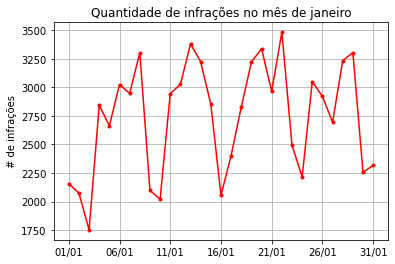

In [5]:
plt.plot(data, contador_data,
         color='red', 
         marker='.', 
         linestyle='solid')

plt.title('Quantidade de infrações no mês de janeiro')
plt.grid()
plt.xticks(np.arange(0, len(data), 5))
plt.ylabel('# de infrações')
plt.draw()
plt.savefig('quantidade-infracoes-janeiro', dpi=150)
plt.show()

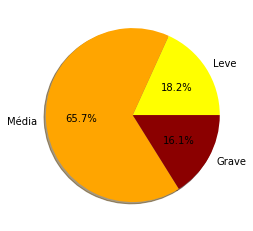

In [6]:
plt.pie(porcentagem_g, labels=gravidades, 
        colors=['yellow', 'orange', 'darkred'], 
        shadow=True, autopct='%1.1f%%')
plt.draw()
plt.savefig('grafico-pizza', dpi=150)
plt.show()